# Analysis traj of protein

In [1]:
import mdtraj as md
chignoli_top = md.load('/home/hsj/ai_workstation/bgflow/experiment/MD_results/1uao/md_nowat.gro').topology
chignoli_traj = md.load('/home/hsj/ai_workstation/bgflow/experiment/MD_results/1uao/md_nowat.xtc', 
        top='/home/hsj/ai_workstation/bgflow/experiment/MD_results/1uao/md_nowat.gro',
        discard_overlapping_frames=True)
chignoli_traj

<mdtraj.Trajectory with 250001 frames, 138 atoms, 10 residues, and unitcells at 0x151fac1863d0>

In [5]:
chignoli_top.n_bonds

141

In [6]:
import numpy as np
table, bonds = chignoli_top.to_dataframe()
coordinates = chignoli_traj.xyz
dim = np.prod(coordinates[0].shape)
backbone = chignoli_top.select('backbone')

In [8]:
np.save('chignolin.npy', coordinates)

In [9]:
backbone

array([  0,   4,   7,   8,   9,  11,  28,  29,  30,  32,  40,  41,  42,
        52,  54,  55,  56,  58,  69,  70,  71,  73,  83,  84,  85,  87,
        90,  91,  92,  94, 104, 105, 106, 108, 128, 129, 130, 132, 135,
       136])

In [10]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import math

def compute_phi_psi(traj):
    phi_atoms_list = md.compute_phi(traj)[0]
    psi_atoms_list = md.compute_psi(traj)[0]
    phi = md.compute_dihedrals(traj, indices=phi_atoms_list)
    psi = md.compute_dihedrals(traj, indices=psi_atoms_list)
    return phi, psi

def plot_phi_psi(phi_list, psi_list):
    if len(phi_list) != len(psi_list):
        raise ValueError("The dimensions of phi_list and psi_list must be the same.")

    if any(len(phi) != len(psi) for phi, psi in zip(phi_list, psi_list)):
        raise ValueError("The inner arrays of phi_list and psi_list must have the same length.")
    
    num_columns = 3
    num_rows = math.ceil(len(phi_list[0]) / num_columns)
    
    # 创建一个图形和子图网格
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
    
    # 将axs转换为一维数组，方便迭代
    axs = axs.ravel()
    
    # 绘制每个子图
    for i, ax in enumerate(axs):
        if i < len(phi_list[0]):  # 确保不会超出索引
            phi = [p[i] for p in phi_list]
            psi = [ps[i] for ps in psi_list]
            ax.hist2d(phi, psi, bins=50, norm=LogNorm())
            ax.set_xlim(-np.pi, np.pi)
            ax.set_ylim(-np.pi, np.pi)
            ax.set_xlabel(f"$\phi_{i+1}(°)$", fontsize=14)
            ax.set_ylabel(f"$\psi_{i+1}(°)$", fontsize=14)
            # ax.set_title(f"Distribution {i+1}")
        else:
            ax.axis('off')  # 对于多余的子图，隐藏坐标轴

    plt.tight_layout()
    plt.show()

In [11]:
phi_list, psi_list = compute_phi_psi(chignoli_traj)

In [12]:
print(md.compute_phi(chignoli_traj)[0])
print(md.compute_psi(chignoli_traj)[0])

[[  7   9  11  28]
 [ 28  30  32  40]
 [ 40  42  52  54]
 [ 54  56  58  69]
 [ 69  71  73  83]
 [ 83  85  87  90]
 [ 90  92  94 104]
 [104 106 108 128]
 [128 130 132 135]]
[[  0   4   7   9]
 [  9  11  28  30]
 [ 30  32  40  42]
 [ 42  52  54  56]
 [ 56  58  69  71]
 [ 71  73  83  85]
 [ 85  87  90  92]
 [ 92  94 104 106]
 [106 108 128 130]]


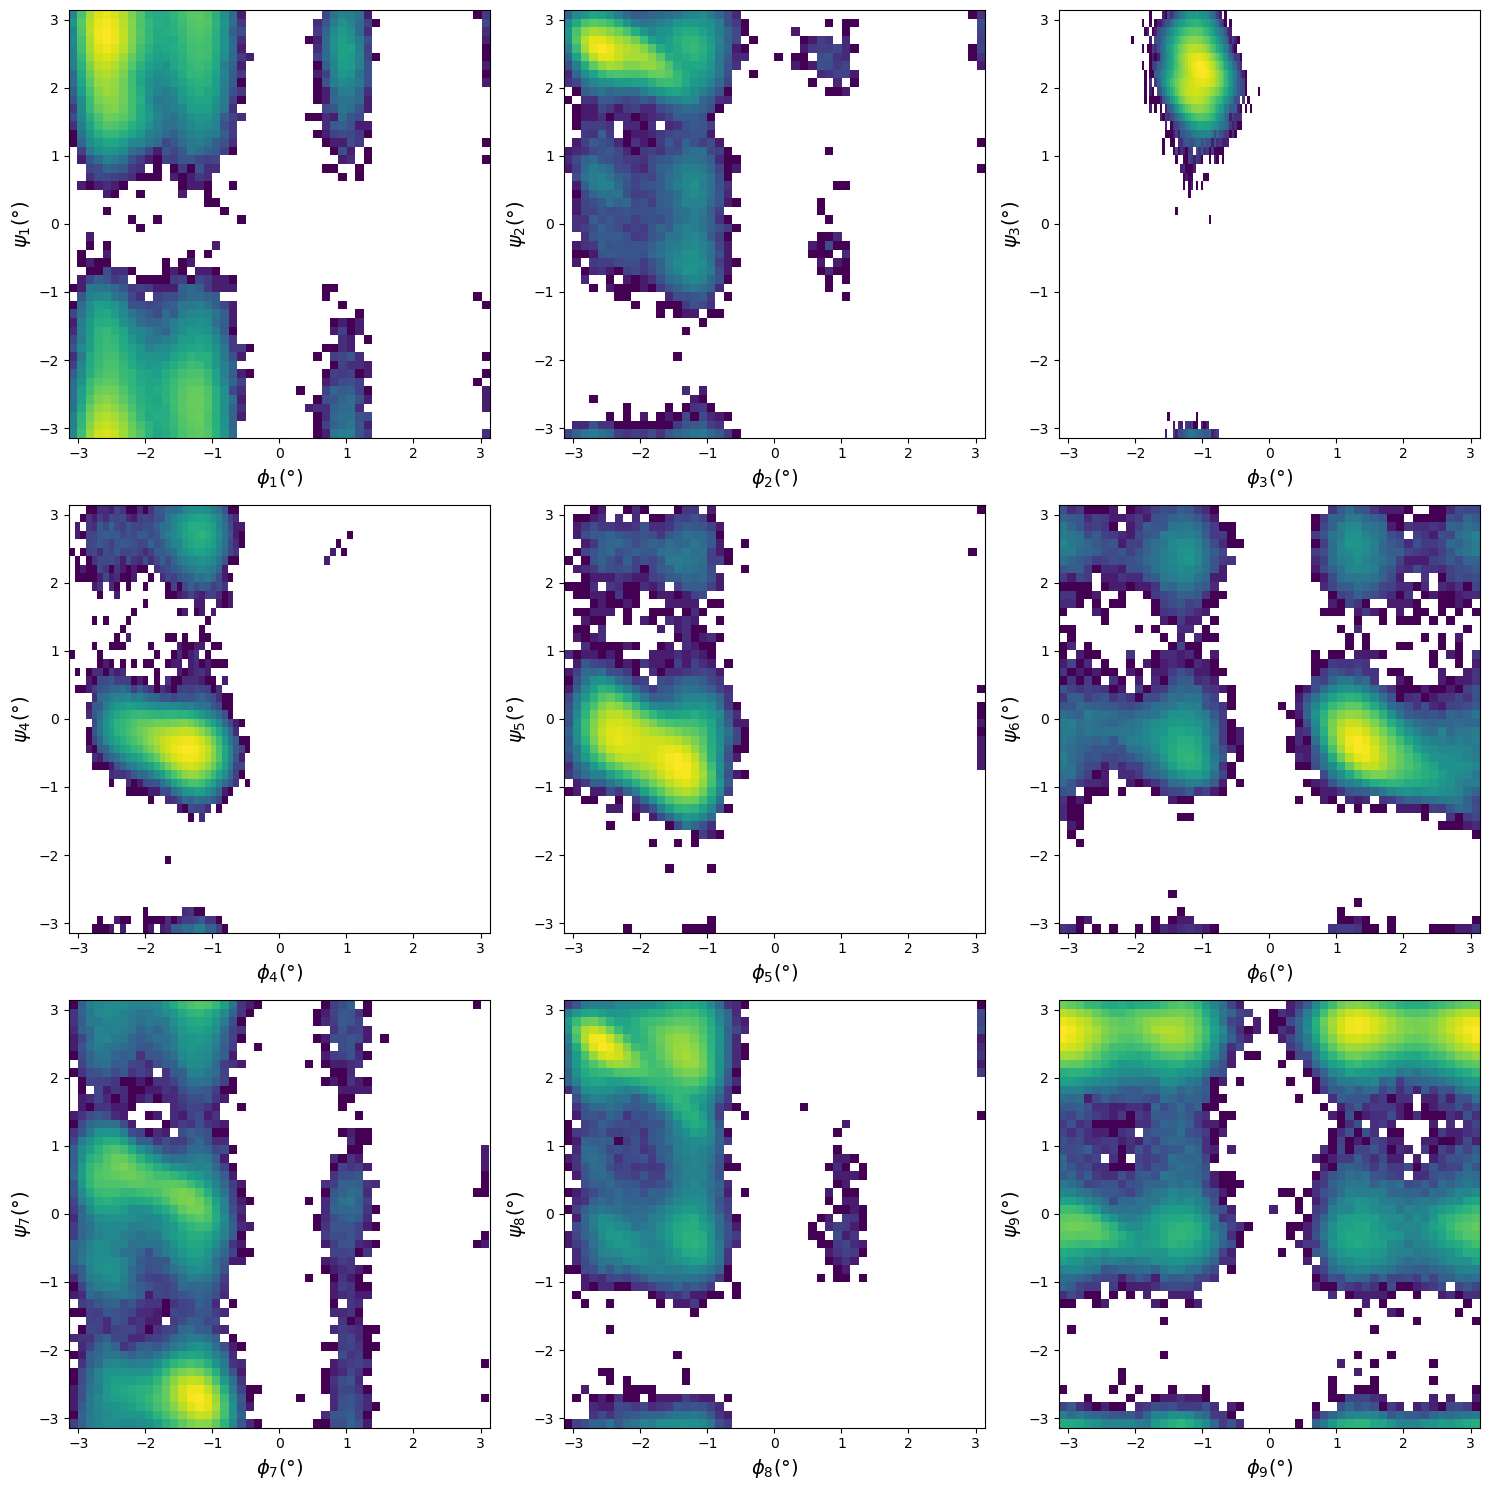

In [13]:
plot_phi_psi(phi_list, psi_list)